In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import t


In [6]:
data=pd.read_csv("/Users/gorkaetxebarriaatutxa/Documents/PBL4/Estadistica/Datos-2.csv",delimiter=',')
print(data.head())


        edad  colesterol_total
0  44.010407        133.891340
1  35.152998        158.530490
2  75.034044        232.263999
3  70.616297        179.518028
4  39.518723        156.938344


Text(0.5, 1.0, 'incomes vs wasted')

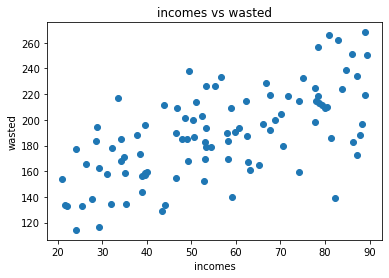

In [7]:
plt.scatter(data['edad'],data['colesterol_total'])
plt.xlabel('incomes')
plt.ylabel('wasted')
plt.title('incomes vs wasted')

In [24]:
x=data['edad']
y=data['colesterol_total']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - ((m_y*m_x)/n)
SS_xx = np.sum(x*x) - ((m_x*m_x)/n)
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
SS_yy= 0
for dat in y:
    SS_yy += (dat - m_y)**2
print('n= ',n)
print('mx= ',m_x)
print('my= ',m_y)
print('Sxy= '+str(SS_xy))
print('Sxx= '+str(SS_xx))
print('Syy= '+str(SS_yy))
print('b1= '+str(b_1))
print('b0= '+str(b_0))

n=  100
mx=  56.243785727631646
my=  188.46808742513153
Sxy= 1103517.94886333
Sxx= 356081.58471434953
Syy= 117534.52225085328
b1= 3.099059306165967
b0= 14.165259851910093


In [9]:
#coeficiente de correlacion
coe=data['edad'].corr(data['colesterol_total'], method='pearson')
print('coeficiente de correlacion= '+ str(coe))

coeficiente de correlacion= 0.6377770552688158


Text(0.5, 1.0, 'incomes vs wasted')

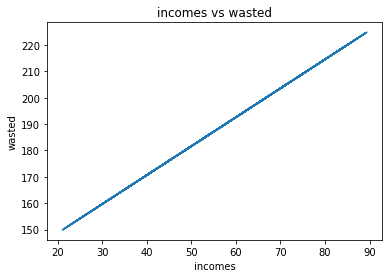

In [10]:
recta_regresion_muestral_y = b_0 + b_1 * data['edad']
plt.plot(data['edad'], recta_regresion_muestral_y)
plt.xlabel('incomes')
plt.ylabel('wasted')
plt.title('incomes vs wasted')

Text(0.5, 1.0, 'incomes vs wasted')

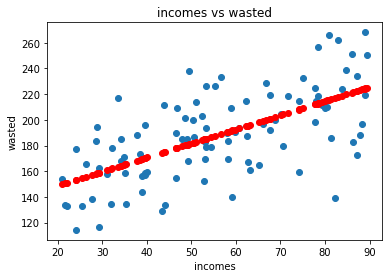

In [11]:

plt.plot(data['edad'], recta_regresion_muestral_y,'ro')
plt.scatter(data['edad'], data['colesterol_total'])
plt.xlabel('incomes')
plt.ylabel('wasted')
plt.title('incomes vs wasted')

Text(0.5, 1.0, 'incomes vs wasted')

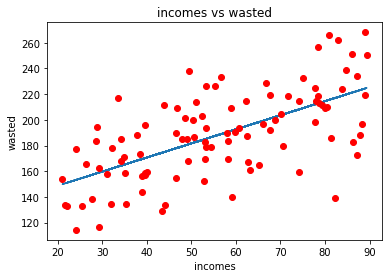

In [12]:
plt.plot(data['edad'], recta_regresion_muestral_y,)
plt.plot(data['edad'], data['colesterol_total'],'ro')
plt.xlabel('incomes')
plt.ylabel('wasted')
plt.title('incomes vs wasted')

In [13]:
sse = 0
sse = SS_yy - b_1 * SS_xy #borrar si va mal
est_var = sse / (n-2)
print('SSE:', sse)
print('Estimacion de varianza:', est_var)

SSE: 69726.23025814895
Estimacion de varianza: 711.4921454913158


In [14]:
varb1 = est_var / SS_xx
varb0 = est_var * ((1/n)+((m_x)**2/SS_xx))
print('varb1:', varb1)
print('varb0:', varb0)

varb1: 0.017887079982456984
varb0: 63.69825619412995


In [15]:
#La suma de residuos debe de dar 0
residuos = []
suma_residuales = 0
for var_y, dat in zip(recta_regresion_muestral_y, data['edad']):
    residuos.append(dat - var_y)
suma_residuos = np.sum(residuos)
print('Suma de residuos:', suma_residuos)

#Las dos sumas deben de ser iguales
suma_valores_recta = np.sum(recta_regresion_muestral_y)
suma_valores_observados = np.sum(data['edad'])
print('Datos de la recta:', recta_regresion_muestral_y)
print('Datos en crudo:', data['edad'])

Suma de residuos: -13222.430169749987
Datos de la recta: 0     175.056422
1     165.345891
2     209.068173
3     204.224921
4     170.132111
         ...    
95    158.885265
96    215.535603
97    195.005128
98    169.093238
99    215.100261
Name: edad, Length: 100, dtype: float64
Datos en crudo: 0     44.010407
1     35.152998
2     75.034044
3     70.616297
4     39.518723
        ...    
95    29.259973
96    80.933276
97    62.206513
98    38.571121
99    80.536181
Name: edad, Length: 100, dtype: float64


In [16]:
#La suma de los residuos ponderados por los valores de x debe de ser 0

suma_residuos_ponderados_x=np.sum(data['edad']*residuos)
print('Suma de residuos ponderados por x:', suma_residuos_ponderados_x)
#La suma de los residuos ponderados por los valores de la y de la recta de regresion debe de ser 0

suma_residuos_ponderados_y=np.sum(recta_regresion_muestral_y*residuos)
print('Suma de residuos ponderados por y', suma_residuos_ponderados_y)


Suma de residuos ponderados por x: -747510.732101907
Suma de residuos ponderados por y -2496206.33931082


In [17]:
tinv = 2.0086

tinv2=t.ppf(1-0.05/2,n-2)

print(tinv2)

r=SS_xy/np.sqrt(SS_xx*SS_yy)
t_student=r*np.sqrt(n-2)/np.sqrt(1-r**2)
if(t_student>tinv):
    print("Hipotesis nula rechazada")
else:
    print("Hipotesis nula aceptada")
print("r= ",r)
print("tinv= ",tinv)
print("t de student= ",t_student)
    

1.984467454426692
Hipotesis nula rechazada
r=  0.637777055268815
tinv=  2.0086
t de student=  8.197219398266412


In [23]:
#Intervalo de confianza para beta 1 beta +- t-student de alfa/2 con n-2 grados * s/sqrt(SSE)
#Intervalo de confianza del 95%, alfa de 0,05 y el tinv(0.975, 50) = 2.0086
s = np.sqrt(est_var)
print(s)
lim_inf_beta1 = b_1 - tinv*(s/np.sqrt(SS_xx))
lim_sup_beta1 = b_1 + tinv*(s/np.sqrt(SS_xx))
print('\n', 'Limite inferior de beta1:', lim_inf_beta1)
print('Limite superior de beta1:', lim_sup_beta1)
print('Limites de beta1:', lim_inf_beta1, '<', b_1, '<', lim_sup_beta1)
#Intervalo de confianza para beta 0 beta+- t-student de alfa/2 con n-2 grados * s * sqrt(1/n + mean(x)**2/sxx)
lim_inf_beta0 = b_0 - tinv*s*(np.sqrt(1/n+(np.mean(data['edad'])**2/SS_xx)))
lim_sup_beta0 = b_0 + tinv*s*(np.sqrt(1/n+(np.mean(data['edad'])**2/SS_xx)))
print('\n','Limite inferior de beta0:', lim_inf_beta0)
print('Limite superior de beta0:', lim_sup_beta0)
print('Limites de beta0:', lim_inf_beta0, '<', b_0, '<', lim_sup_beta0)

26.6738101045073

 Limite inferior de beta1: 0.8276819776528399
Limite superior de beta1: 1.364952704231759
Limites de beta1: 0.8276819776528399 < 1.0963173409422995 < 1.364952704231759

 Limite inferior de beta0: 110.77617472912647
Limite superior de beta0: 142.83792489424542
Limites de beta0: 110.77617472912647 < 126.80704981168594 < 142.83792489424542


In [19]:
#Intervalo de estimacion para la respuesta media
#Utilizaremos el tin anteriormente utilizado tinv(0.975, 98) = 1.9845

lim_inf_rep_med = []
lim_sup_rep_med = []

for var_x in data['edad']:
    val_x = b_0+b_1*var_x
    lim_inf_rep_med.append((val_x) - (tinv * s * np.sqrt((1/n) + (var_x - m_x)**2/SS_xx)))
for var_x in data['edad']:
    val_x = b_0+b_1*var_x
    lim_sup_rep_med.append((val_x) + (tinv * s * np.sqrt((1/n) + (var_x - m_x)**2/SS_xx)))

#Intervalo de prediccion para una observacion futura
lim_inf_obs_fut = []
lim_sup_obs_fut = []

for var_y, var_x in zip(recta_regresion_muestral_y, data['edad']):
    lim_inf_obs_fut.append((var_y) - (tinv * s * np.sqrt(1 + (1/n) + (var_x - m_x)**2/SS_xx)))
    
for var_y, var_x in zip(recta_regresion_muestral_y, data['edad']):
    lim_sup_obs_fut.append((var_y) + (tinv * s * np.sqrt(1 + (1/n) + (var_x - m_x)**2/SS_xx)))
dist_lim = []
for inf, sup in zip(lim_inf_obs_fut, lim_sup_obs_fut):
    dist_lim.append(sup-inf)

In [26]:
limitesinferior=() - (tinv * s * np.sqrt(1 + (1/n) + (80 - m_x)**2/SS_xx))
limitesuperior=(b_0+b_1*80) +(tinv * s * np.sqrt(1 + (1/n) + (80 - m_x)**2/SS_xx))
print(limitesinferior)
print(limitesuperior)

208.20354054051245
315.9764681498624


In [20]:
lim_inf_rep_med.sort();
lim_sup_rep_med.sort();
lim_inf_obs_fut.sort();
lim_sup_obs_fut.sort();


Text(0.5, 1.0, 'Desechos de comida segun los ingresos')

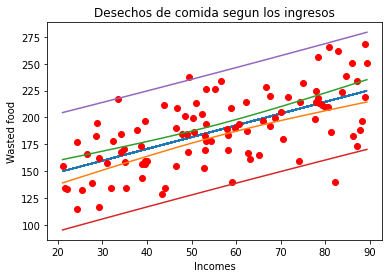

In [21]:
plt.plot(data['edad'], recta_regresion_muestral_y)
plt.plot(data['edad'], data['colesterol_total'], 'ro')
plt.plot(data['edad'].sort_values(), lim_inf_rep_med)
plt.plot(data['edad'].sort_values(), lim_sup_rep_med)
plt.plot(data['edad'].sort_values(), lim_inf_obs_fut)
plt.plot(data['edad'].sort_values(), lim_sup_obs_fut)
plt.xlabel('Incomes')
plt.ylabel('Wasted food')
plt.title('Desechos de comida segun los ingresos')

inferencia de la comida desperdiciada para una riqueza de 5000=  5608.393754523183
inferencia de la comida desperdiciada para una riqueza de 20000=  22053.153868657675
inferencia de la comida desperdiciada para una riqueza de 30000=  33016.32727808067
inferencia de la comida desperdiciada para una riqueza de 50000=  54942.67409692666
